<a href="https://colab.research.google.com/github/aideveloperme/AI-Project/blob/main/News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Write files from**

/content/news_nitmz_vanglaini
to  their respective category inside the data folder.

data/hmarchhak

data/khawvel

data/ramchhung

data/tualchhung

In [ ]:
with open('news_nitmz_vanglaini', 'r', errors='ignore') as f:
  text = f.read()
  news = text.split("\n\n")
  count = {'hmarchhak': 0, 'khawvel': 0, 'ramchhung': 0, 'tualchhung': 0}
  for news_item in news:
        lines = news_item.split("\n")
        print(lines[6])
        file_to_write = open('data/' + lines[6] + '/' + str(count[lines[6]]) + '.txt', 'w+')
        count[lines[6]] = count[lines[6]] + 1
        file_to_write.write(news_item)  # python will convert \n to os.linesep
        file_to_write.close()

hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak
hmarchhak


**Write Data and flag them to memory**

In [ ]:
import pandas
import glob

category_list = [ "hmarchhak", "khawvel", "ramchhung", "tualchhung"]
directory_list = ["data/hmarchhak/*.txt", "data/khawvel/*.txt", "data/ramchhung/*.txt", "data/tualchhung/*.txt", ]

text_files = list(map(lambda x: glob.glob(x), directory_list))
text_files = [item for sublist in text_files for item in sublist]

training_data = []

for t in text_files:
    f = open(t, 'r')
    f = f.read()
    t = f.split('\n')
    training_data.append({'data': t[0] + " " + t[1], 'flag': category_list.index(t[6])})

print(training_data[2])

{'data': "Tripura minister hlui bail dilna phalsak Tripura High court chuan Inrinni khan Tri\xadpura assembly-a oppo\xadsition deputy leader leh state finance minister hlui, Badal Choudhury-a'n bail a dilna chu a phalsak.\xa0Minister hlui, Badal Choudhury hi minister a nih laia Public Works Department (PWD) sum, cheng vaibelchhe 162 tihchingpen chungchangah thubuai siamsak niin, nikum October thla khan man a ni.\xa0Choudhury rual hian sum tihchingpen a nih hunlaia chief engineer Subal Bhowmik pawh man tel a ni a, mahse a ni pawh hi a hmain bail-a chhuah\xadtir a lo ni tawh. Hetih lai hian he thila inhnam\xadhnawiha puh tel, principal secretary YP Singh erawh man a la ni ve lo.\xa0Police-te chuan Chou\xaddhury hi ILP Hospital-a enkawl a ni laiin an man a, West Agaratala police station-a lock-up ah an hreng zui a ni. Mahse a hriselna a ṭhat loh avangin damdawi-inah enkawl zui a ni a, damdawi-inah ni 19 chhung enkawl a nih hnuah judicial custody hnuaiah ni 86 dah zui leh a ni.", 'flag': 0

In [ ]:
training_data = pandas.DataFrame(training_data, columns=['data', 'flag'])
training_data.to_csv("train_data1.csv", sep=',', encoding='utf-8')
print(training_data.data.shape)

(2290,)


In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

#GET VECTOR COUNT
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.data)
print(X_train_counts.shape)
#SAVE WORD VECTOR
pickle.dump(count_vect.vocabulary_, open("count_vector.pkl","wb"))

(2290, 18454)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

#TRANSFORM WORD VECTOR TO TF IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#SAVE TF-IDF
pickle.dump(tfidf_transformer, open("tfidf.pkl","wb"))
print(X_train_tfidf.shape)

(2290, 18454)


In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#clf = MultinomialNB().fit(X_train_tfidf, training_data.flag)
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.10, random_state=42)
clf = MultinomialNB().fit(X_train, y_train)

#SAVE MODEL
pickle.dump(clf, open("nb_model.pkl", "wb"))

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ["hmarchhak", "khawvel", "ramchhung", "tualchhung"]
docs_new = "Khawvela hripui leng mek, Covid-19 kai chu an la pun belh zel a, nimin thleng khan he hri kai hi maktaduai 9 an chuang tawh."
docs_new = [docs_new]
#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("nb_model.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print(category_list[predicted[0]])

khawvel


In [ ]:
predicted = loaded_model.predict(X_test)
result_bayes = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_bayes.to_csv('res_bayes.csv', sep = ',')

In [ ]:
print("ORIGINAL==========PREDICTED")
for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

ORIGINAL==========PREDICTED
tualchhung  -  tualchhung
tualchhung  -  ramchhung
ramchhung  -  ramchhung
hmarchhak  -  hmarchhak
tualchhung  -  tualchhung
ramchhung  -  ramchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
ramchhung  -  hmarchhak
hmarchhak  -  hmarchhak
khawvel  -  khawvel
ramchhung  -  khawvel
khawvel  -  khawvel
khawvel  -  khawvel
tualchhung  -  hmarchhak
ramchhung  -  ramchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
khawvel  -  khawvel
ramchhung  -  ramchhung
tualchhung  -  tualchhung
khawvel  -  khawvel
hmarchhak  -  hmarchhak
tualchhung  -  tualchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
tualchhung  -  ramchhung
hmarchhak  -  hmarchhak
ramchhung  -  ramchhung
khawvel  -  khawvel
hmarchhak  -  hmarchhak
khawvel  -  khawvel
tualchhung  -  tualchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
ramchhung  -  ramchhung
ramchhung  -  ramchhung
khawvel  -  khawvel
ramchhung  -  ramchhung
tualchhung  -  

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mat_NB = confusion_matrix(y_test,predicted)
print(confusion_mat_NB)

[[48  1  1  6]
 [ 0 46  1  1]
 [ 1  1 48  3]
 [ 0  0  4 68]]


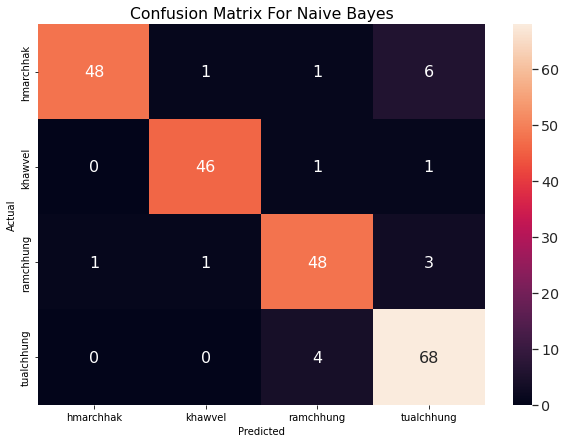

In [ ]:
import pandas as pd1
import seaborn as sn1
import matplotlib.pyplot as plt1
plt1.figure(figsize=(10,7))
ax1= plt1.subplot()
sn1.set(font_scale=1.3) # for label size
df_cm2 = pd1.DataFrame(confusion_mat_NB, range(4), range(4))
sn1.heatmap(df_cm2, annot=True, annot_kws={"size": 16}) # font size
ax1.set_xlabel('Predicted');ax1.set_ylabel('Actual');
ax1.set_title('Confusion Matrix For Naive Bayes');
ax1.xaxis.set_ticklabels(['hmarchhak', 'khawvel', 'ramchhung', 'tualchhung']);
ax1.yaxis.set_ticklabels(['hmarchhak', 'khawvel', 'ramchhung', 'tualchhung']);
plt1.show()

In [ ]:
from sklearn.metrics import precision_score, classification_report


target_names = ['hmarchhak', 'khawvel', 'ramchhung', 'tualchhung']
print(classification_report(y_test,predicted,target_names=target_names))

              precision    recall  f1-score   support

   hmarchhak       0.98      0.86      0.91        56
     khawvel       0.96      0.96      0.96        48
   ramchhung       0.89      0.91      0.90        53
  tualchhung       0.87      0.94      0.91        72

    accuracy                           0.92       229
   macro avg       0.92      0.92      0.92       229
weighted avg       0.92      0.92      0.92       229



In [ ]:
from sklearn.neural_network import MLPClassifier

clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=1000, hidden_layer_sizes=(15,), random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)

clf_neural.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
pickle.dump(clf_neural, open("softmax.pkl", "wb"))


In [ ]:
predicted = clf_neural.predict(X_test)
result_softmax = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_softmax.to_csv('res_softmax.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

tualchhung  -  tualchhung
tualchhung  -  ramchhung
ramchhung  -  ramchhung
hmarchhak  -  hmarchhak
tualchhung  -  tualchhung
ramchhung  -  ramchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
ramchhung  -  hmarchhak
hmarchhak  -  hmarchhak
khawvel  -  khawvel
ramchhung  -  khawvel
khawvel  -  khawvel
khawvel  -  khawvel
tualchhung  -  hmarchhak
ramchhung  -  ramchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
khawvel  -  khawvel
ramchhung  -  ramchhung
tualchhung  -  tualchhung
khawvel  -  khawvel
hmarchhak  -  hmarchhak
tualchhung  -  tualchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
tualchhung  -  ramchhung
hmarchhak  -  hmarchhak
ramchhung  -  ramchhung
khawvel  -  khawvel
hmarchhak  -  hmarchhak
khawvel  -  khawvel
tualchhung  -  tualchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
ramchhung  -  ramchhung
ramchhung  -  ramchhung
khawvel  -  khawvel
ramchhung  -  ramchhung
tualchhung  -  tualchhung
tualchhung  -  tu

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mat_Neural = confusion_matrix(y_test,predicted)
print(confusion_mat_Neural)

[[124   0   8   1]
 [  1 133   9   0]
 [  1   4 118   6]
 [  0   0  11 157]]


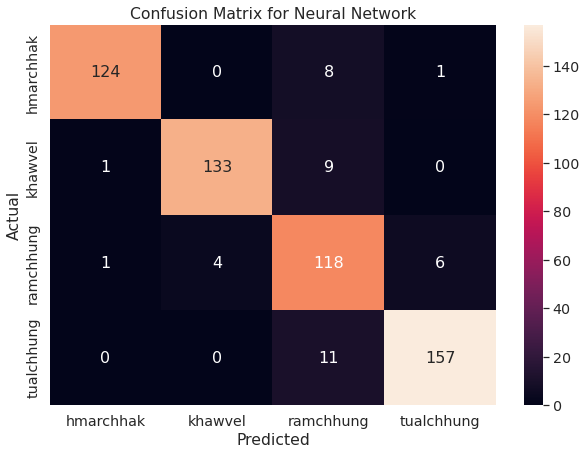

In [ ]:
import pandas as pd1
import seaborn as sn1
import matplotlib.pyplot as plt1
plt1.figure(figsize=(10,7))
ax1= plt1.subplot()
sn1.set(font_scale=1.3) # for label size
df_cm2 = pd1.DataFrame(confusion_mat_Neural, range(4), range(4))
sn1.heatmap(df_cm2, annot=True,fmt='g', annot_kws={"size": 16}) # font size
ax1.set_xlabel('Predicted');ax1.set_ylabel('Actual');
ax1.set_title('Confusion Matrix for Neural Network');
ax1.xaxis.set_ticklabels(['hmarchhak', 'khawvel', 'ramchhung', 'tualchhung']);
ax1.yaxis.set_ticklabels(['hmarchhak', 'khawvel', 'ramchhung', 'tualchhung']);
plt1.show()

In [ ]:
from sklearn.metrics import precision_score, classification_report


target_names = ['hmarchhak', 'khawvel', 'ramchhung', 'tualchhung']
print(classification_report(y_test,predicted,target_names=target_names))

              precision    recall  f1-score   support

   hmarchhak       0.98      0.93      0.96       133
     khawvel       0.97      0.93      0.95       143
   ramchhung       0.81      0.91      0.86       129
  tualchhung       0.96      0.93      0.95       168

    accuracy                           0.93       573
   macro avg       0.93      0.93      0.93       573
weighted avg       0.93      0.93      0.93       573



In [ ]:
from sklearn import svm
clf_svm = svm.LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)
clf_svm.fit(X_train_tfidf, training_data.flag)
pickle.dump(clf_svm, open("svm.pkl", "wb"))

In [ ]:
predicted = clf_svm.predict(X_test)
result_svm = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_svm.to_csv('res_svm.csv', sep = ',')
for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

tualchhung  -  tualchhung
ramchhung  -  ramchhung
ramchhung  -  ramchhung
hmarchhak  -  hmarchhak
tualchhung  -  tualchhung
ramchhung  -  ramchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
ramchhung  -  hmarchhak
hmarchhak  -  hmarchhak
khawvel  -  khawvel
ramchhung  -  khawvel
khawvel  -  khawvel
khawvel  -  khawvel
hmarchhak  -  hmarchhak
ramchhung  -  ramchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
khawvel  -  khawvel
ramchhung  -  ramchhung
tualchhung  -  tualchhung
khawvel  -  khawvel
hmarchhak  -  hmarchhak
tualchhung  -  tualchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
ramchhung  -  ramchhung
hmarchhak  -  hmarchhak
ramchhung  -  ramchhung
khawvel  -  khawvel
hmarchhak  -  hmarchhak
khawvel  -  khawvel
tualchhung  -  tualchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
ramchhung  -  ramchhung
ramchhung  -  ramchhung
khawvel  -  khawvel
ramchhung  -  ramchhung
tualchhung  -  tualchhung
tualchhung  -  tualc

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mat_SVM = confusion_matrix(y_test,predicted)
print(confusion_mat_SVM)

[[131   0   1   1]
 [  0 137   2   4]
 [  0   0 127   2]
 [  0   0   2 166]]


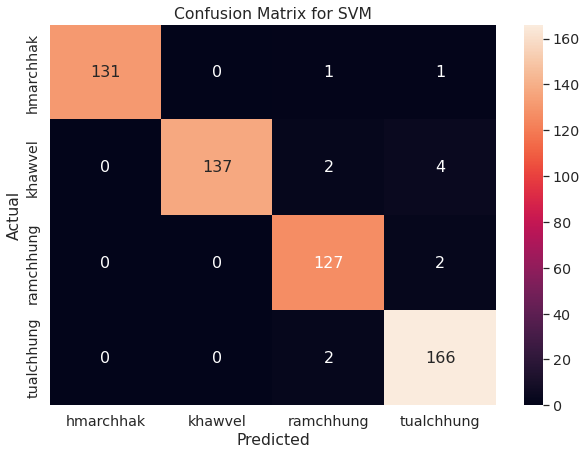

In [ ]:
import pandas as pd1
import seaborn as sn1
import matplotlib.pyplot as plt1
plt1.figure(figsize=(10,7))
ax1= plt1.subplot()
sn1.set(font_scale=1.3) # for label size
df_cm2 = pd1.DataFrame(confusion_mat_SVM, range(4), range(4))
sn1.heatmap(df_cm2, annot=True,fmt='g', annot_kws={"size": 16}) # font size
ax1.set_xlabel('Predicted');ax1.set_ylabel('Actual');
ax1.set_title('Confusion Matrix for SVM');
ax1.xaxis.set_ticklabels(['hmarchhak', 'khawvel', 'ramchhung', 'tualchhung']);
ax1.yaxis.set_ticklabels(['hmarchhak', 'khawvel', 'ramchhung', 'tualchhung']);
plt1.show()

In [ ]:
from sklearn.metrics import precision_score, classification_report


target_names = ['hmarchhak', 'khawvel', 'ramchhung', 'tualchhung']
print(classification_report(y_test,predicted,target_names=target_names))

              precision    recall  f1-score   support

   hmarchhak       1.00      0.98      0.99       133
     khawvel       1.00      0.96      0.98       143
   ramchhung       0.96      0.98      0.97       129
  tualchhung       0.96      0.99      0.97       168

    accuracy                           0.98       573
   macro avg       0.98      0.98      0.98       573
weighted avg       0.98      0.98      0.98       573



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)
dt.fit(X_train_tfidf, training_data.flag)
pickle.dump(dt, open("dt.pkl", "wb"))

In [ ]:
predicted = dt.predict(X_test)
result_dt = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})
result_dt.to_csv('dt.csv', sep = ',')
for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

tualchhung  -  tualchhung
ramchhung  -  ramchhung
ramchhung  -  ramchhung
hmarchhak  -  hmarchhak
tualchhung  -  tualchhung
ramchhung  -  ramchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
hmarchhak  -  hmarchhak
hmarchhak  -  hmarchhak
khawvel  -  khawvel
khawvel  -  khawvel
khawvel  -  khawvel
khawvel  -  khawvel
hmarchhak  -  hmarchhak
ramchhung  -  ramchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
khawvel  -  khawvel
ramchhung  -  ramchhung
tualchhung  -  tualchhung
khawvel  -  khawvel
hmarchhak  -  hmarchhak
tualchhung  -  tualchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhung
ramchhung  -  ramchhung
hmarchhak  -  hmarchhak
ramchhung  -  ramchhung
khawvel  -  khawvel
hmarchhak  -  hmarchhak
khawvel  -  khawvel
tualchhung  -  tualchhung
ramchhung  -  tualchhung
tualchhung  -  tualchhung
ramchhung  -  ramchhung
ramchhung  -  ramchhung
khawvel  -  khawvel
ramchhung  -  ramchhung
tualchhung  -  tualchhung
tualchhung  -  tualchhu

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mat_dt = confusion_matrix(y_test,predicted)
print(confusion_mat_dt)

[[131   0   1   1]
 [  0 137   2   4]
 [  0   0 127   2]
 [  0   0   2 166]]


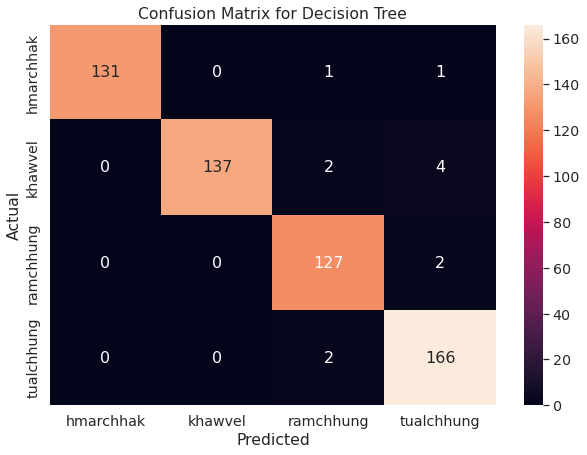

In [ ]:
import pandas as pd1
import seaborn as sn1
import matplotlib.pyplot as plt1
plt1.figure(figsize=(10,7))
ax1= plt1.subplot()
sn1.set(font_scale=1.3) # for label size
df_cm2 = pd1.DataFrame(confusion_mat_dt, range(4), range(4))
sn1.heatmap(df_cm2, annot=True,fmt='g', annot_kws={"size": 16}) # font size
ax1.set_xlabel('Predicted');ax1.set_ylabel('Actual');
ax1.set_title('Confusion Matrix for Decision Tree');
ax1.xaxis.set_ticklabels(['hmarchhak', 'khawvel', 'ramchhung', 'tualchhung']);
ax1.yaxis.set_ticklabels(['hmarchhak', 'khawvel', 'ramchhung', 'tualchhung']);
plt1.show()

In [ ]:
from sklearn.metrics import precision_score, classification_report

target_names = ['hmarchhak', 'khawvel', 'ramchhung', 'tualchhung']
print(classification_report(y_test,predicted,target_names=target_names))

              precision    recall  f1-score   support

   hmarchhak       1.00      0.98      0.99       133
     khawvel       1.00      0.96      0.98       143
   ramchhung       0.96      0.98      0.97       129
  tualchhung       0.96      0.99      0.97       168

    accuracy                           0.98       573
   macro avg       0.98      0.98      0.98       573
weighted avg       0.98      0.98      0.98       573

